<a href="https://www.kaggle.com/code/elhamfallah/airline-passenger-satisfaction?scriptVersionId=118245924" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:

import matplotlib.pyplot as plt
import seaborn as sns
import squarify as sq
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/classification-predicting-customer-satisfaction/__results__.html
/kaggle/input/classification-predicting-customer-satisfaction/__resultx__.html
/kaggle/input/classification-predicting-customer-satisfaction/__notebook__.ipynb
/kaggle/input/classification-predicting-customer-satisfaction/__output__.json
/kaggle/input/classification-predicting-customer-satisfaction/custom.css
/kaggle/input/classification-predicting-customer-satisfaction/__results___files/__results___19_1.png
/kaggle/input/classification-predicting-customer-satisfaction/__results___files/__results___15_1.png
/kaggle/input/classification-predicting-customer-satisfaction/__results___files/__results___11_1.png
/kaggle/input/classification-predicting-customer-satisfaction/__results___files/__results___21_1.png
/kaggle/input/classification-predicting-customer-satisfaction/__results___files/__results___17_1.png
/kaggle/input/classification-predicting-customer-satisfaction/catboost_info/learn_error.tsv
/kaggle/input

In [2]:
df=pd.read_csv('/kaggle/input/airline-passenger-satisfaction/test.csv')
df.sample(5)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
447,447,80083,Male,Loyal Customer,53,Business travel,Eco Plus,550,3,4,...,3,5,1,3,4,3,3,0,0.0,satisfied
19913,19913,52728,Male,Loyal Customer,31,Personal Travel,Eco,406,4,4,...,5,4,3,4,5,4,5,0,0.0,satisfied
1011,1011,13179,Male,Loyal Customer,24,Business travel,Business,542,3,3,...,5,5,3,4,4,2,5,7,9.0,satisfied
6803,6803,81672,Female,Loyal Customer,56,Business travel,Business,3524,4,4,...,5,5,5,5,5,5,5,0,0.0,satisfied
14247,14247,41086,Male,Loyal Customer,37,Business travel,Eco,316,5,5,...,5,1,3,4,5,1,5,54,49.0,satisfied


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

In [4]:
for col in df.columns:
    print(col)

Unnamed: 0
id
Gender
Customer Type
Age
Type of Travel
Class
Flight Distance
Inflight wifi service
Departure/Arrival time convenient
Ease of Online booking
Gate location
Food and drink
Online boarding
Seat comfort
Inflight entertainment
On-board service
Leg room service
Baggage handling
Checkin service
Inflight service
Cleanliness
Departure Delay in Minutes
Arrival Delay in Minutes
satisfaction


In [5]:
df.dtypes

Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure 

In [6]:
df.shape

(25976, 25)

In [7]:
df = df.drop(['Unnamed: 0', 'id'], axis = 1)

df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,25976.0,39.620958,15.135685,7.0,27.0,40.0,51.0,85.0
Flight Distance,25976.0,1193.788459,998.683999,31.0,414.0,849.0,1744.0,4983.0
Inflight wifi service,25976.0,2.724746,1.335384,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,25976.0,3.046812,1.533371,0.0,2.0,3.0,4.0,5.0
Ease of Online booking,25976.0,2.756775,1.412951,0.0,2.0,3.0,4.0,5.0
Gate location,25976.0,2.977094,1.282133,1.0,2.0,3.0,4.0,5.0
Food and drink,25976.0,3.215353,1.331506,0.0,2.0,3.0,4.0,5.0
Online boarding,25976.0,3.261665,1.355536,0.0,2.0,4.0,4.0,5.0
Seat comfort,25976.0,3.449222,1.320090,1.0,2.0,4.0,5.0,5.0
Inflight entertainment,25976.0,3.357753,1.338299,0.0,2.0,4.0,4.0,5.0


In [9]:
df.isna().sum()

Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0
dtype: int64

In [10]:
#fillna : Filling In Missing Data
df= df.fillna(method='ffill')
df.isna().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [11]:
#drop_duplicates
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
25971    False
25972    False
25973    False
25974    False
25975    False
Length: 25976, dtype: bool

In [12]:
df=df.drop_duplicates()

Text(0, 0.5, 'Flight Distance')

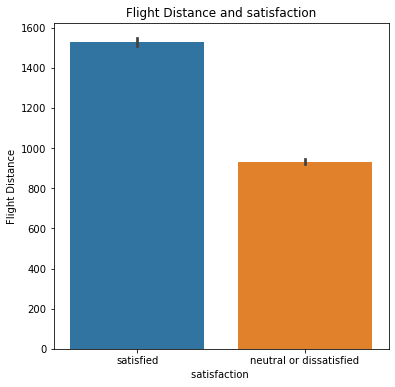

In [13]:
plt.figure(figsize = (6, 6))

sns.barplot(x = "satisfaction", y = "Flight Distance", data = df)

plt.title("Flight Distance and satisfaction")

plt.xlabel("satisfaction ")
plt.ylabel("Flight Distance")